# Paths for the Jump diffusion process of Merton

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def GeneratePathsMerton(NoOfPaths, NoOfSteps,S0,T,epsP,muJ,sigmaJ,r,sigma):
    #Create empty matrices for Poisson process and for compensated Poisson process
    # for Poisson Process 
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    # dynamics of stock
    S = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    # Expectation E[e^J] for J ~ N(muJ, sigmaJ^2)
    # Expectation of exponent of Normal distribution e^(mu + 1/2 * sigma^2)
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    
    # Poisson distribution
    ZPois = np.random.poisson(epsP*dt,[NoOfPaths, NoOfSteps])
    # Normal distribution for Brownian Motion
    Z = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    # Jump
    J = np.random.normal(muJ, sigmaJ, [NoOfPaths, NoOfSteps])
    
    for i in range(0, NoOfSteps):
        # Standardization : Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:,i] - np.mean(Z[:,i]))/np.std(Z[:,i])
        # Making sure that samples from normal have mean 0 and variance 1
        
        X[:, i+1] = X[:,i] + (r - epsP*(EeJ - 1) - 0.5*sigma*sigma)*dt + sigma*np.sqrt(dt)*Z[:,i] + J[:,i]*ZPois[:,i]
        
        time[i+1] = time[i] + dt
        
    S = np.exp(X)
    
    paths = {"time" : time, "X" : X, "S" : S}
    
    return paths
    

In [5]:
def GeneratePathsPoisson(NoOfPaths, NoOfSteps, T, epsP):
    # create empty matrices for Poisson Process and for the dynamics for stock S(t)
    # for Poisson Process 
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    # for compensated Poisson Process
    Xc = np.zeros([NoOfPaths, NoOfSteps + 1])
    
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    Z = np.random.poisson(epsP*dt, [NoOfPaths, NoOfSteps])
    for i in range(0, NoOfSteps):
        X[:, i+1] = X[:, i] + Z[:, i]
        Xc[:, i+1] = Xc[:, i] - epsP*dt + Z[:, i]
        time[i+1] = time[i] + dt
        
    paths = {"time" : time, "X" : X, "Xcomp" : Xc}
    
    return paths


In [14]:
def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T      = 5
    
    # epsP determines how often the jump occurs, J determine how large
    epsP   = 1
    
    # Jump elements
    muJ    = 0  # magnitude of the jump
    sigmaJ = 0.005 
    # Jump elements
    
    sigma  = 0.2
    S0     = 100
    r      = 0.5
    
    Paths = GeneratePathsMerton(NoOfPaths, NoOfSteps, S0, T, epsP, muJ, sigmaJ, r, sigma)
    timeGrid = Paths["time"]
    
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

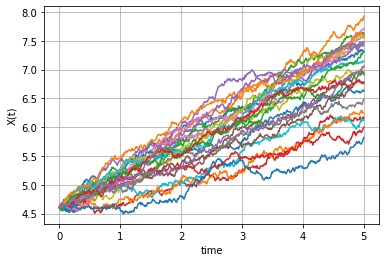

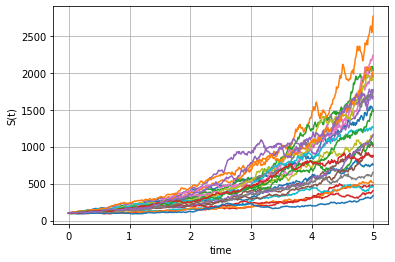

In [15]:
mainCalculation()